In [1]:
# importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# cargando el archivo
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# estadisticas del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Preparando los datos

In [4]:
# eliminando columnas innecesarias
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
# visualizando categorias de las columnas
df['Geography'].value_counts()
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [6]:
# realizando encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [7]:
# seleccionando datos par entrenar la red neuronal
X = df.drop(columns=['Exited'])
y = df['Exited'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
# # estandarizando los datos
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

## Creando Modelo

In [9]:
# Crear un modelo secuencial: las capas se apilan en orden.
model = Sequential()

# Agregar la primera capa densa (capa de entrada):
# - 11 neuronas (unidades) en la capa.
# - Función de activación 'sigmoid', que convierte las salidas en valores entre 0 y 1.
# - `input_dim=11`: La entrada a esta capa debe ser un vector de 11 características.
model.add(Dense(11, activation='sigmoid', input_dim=11))

# Agregar una segunda capa densa (capa oculta):
# - 11 neuronas.
# - También utiliza la activación 'sigmoid'.
# - No se especifica `input_dim` porque Keras automáticamente conecta esta capa con la anterior.
model.add(Dense(11, activation='sigmoid'))

# Agregar la capa de salida:
# - 1 neurona, ya que este modelo está diseñado para producir un único valor de salida.
# - Activación 'sigmoid', que convierte la salida en un valor entre 0 y 1.
#   Esto es ideal para problemas de clasificación binaria (e.g., predicción de "sí" o "no").
model.add(Dense(1, activation='sigmoid'))

In [10]:
# resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

- La red tiene tres capas densas (totalmente conectadas) que transforman las entradas en salidas de acuerdo con su configuración.
  
- La salida final es un único valor (con una sola neurona en la última capa), lo que podría indicar que este modelo está diseñado para una tarea de clasificación binaria o regresión.

- El número de parámetros indica la complejidad del modelo. En total, el modelo tiene un total de 132 (capa 1) + 132 (capa 2) + 12 (capa 3) = 276 parámetros que se entrenarán.

In [11]:
# Configurar el modelo para el entrenamiento
model.compile(
    # Especificar el optimizador que ajustará los pesos del modelo durante el entrenamiento.
    # 'Adam' es un optimizador eficiente que ajusta dinámicamente la tasa de aprendizaje 
    # y combina las ventajas de los métodos SGD y RMSProp.
    optimizer='Adam',
    
    # Definir la función de pérdida que el modelo usará para calcular el error.
    # 'binary_crossentropy' es adecuada para problemas de clasificación binaria.
    # Compara las probabilidades predichas (entre 0 y 1) con las etiquetas reales (0 o 1).
    loss='binary_crossentropy',
    
    # Especificar las métricas que se evaluarán durante el entrenamiento y la validación.
    # Aquí, 'accuracy' mide el porcentaje de predicciones correctas.
    metrics=['accuracy']
)

In [12]:
# Convierte los datos si es necesario
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_train, dtype=np.float32)
y_test = np.array(y_train, dtype=np.float32)

In [13]:
# Entrenar el modelo con los datos de entrenamiento
history = model.fit(
    X_train,          # Conjunto de datos de entrada (características) para el entrenamiento.
    y_train,          # Conjunto de etiquetas (valores reales) correspondientes a X_train.
    batch_size=50,    # Tamaño del lote: el modelo procesará 50 muestras por iteración.
    epochs=100,       # Número de épocas: el modelo verá los datos de entrenamiento completos 100 veces.
    verbose=1,        # Nivel de salida en consola:
                      # - 0: Sin salida.
                      # - 1: Barra de progreso por época.
                      # - 2: Una línea por cada época.
    validation_split=0.2  # Proporción de los datos de entrenamiento que se usará para validación.
                          # En este caso, el 20% de los datos de entrenamiento se usará como conjunto de validación.
)


Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7891 - loss: 0.5676 - val_accuracy: 0.7969 - val_loss: 0.5032
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7942 - loss: 0.5063 - val_accuracy: 0.7969 - val_loss: 0.4990
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8023 - loss: 0.4932 - val_accuracy: 0.7969 - val_loss: 0.4973
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8021 - loss: 0.4921 - val_accuracy: 0.7969 - val_loss: 0.4964
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: 0.5001 - val_accuracy: 0.7969 - val_loss: 0.4955
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.4999 - val_accuracy: 0.7969 - val_loss: 0.4950
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7999 - loss: 0.4930 - val_accuracy: 0.7969 - val_loss: 0.4949
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7929 - loss: 0.5046 - val_accu

In [14]:
y_pred = model.predict(X_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
y_pred

array([[0.15103012],
       [0.25263476],
       [0.25263476],
       ...,
       [0.25263476],
       [0.15103012],
       [0.25263476]], dtype=float32)

In [16]:
y_pred = y_pred.argmax(axis=-1)

In [17]:
accuracy_score(y_test,y_pred)

0.796

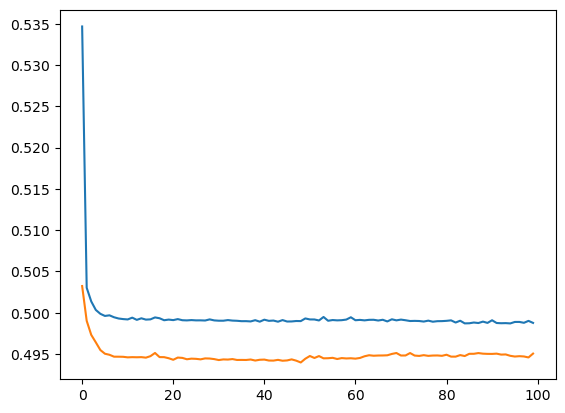

In [18]:
# Graficar la pérdida (loss) del conjunto de entrenamiento
plt.plot(history.history['loss'])
# Graficar la pérdida (loss) del conjunto de validación
plt.plot(history.history['val_loss'])
plt.show()

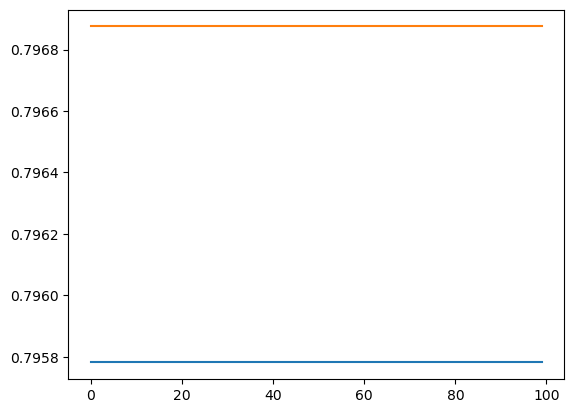

In [19]:
# Graficar la precisión (accuracy) en el conjunto de entrenamiento
plt.plot(history.history['accuracy'])
# Graficar la precisión (accuracy) en el conjunto de validación
plt.plot(history.history['val_accuracy'])
plt.show()